In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz

# 1. 의사결정나무

유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라.   그리고 모델의 정확도와 confusion matrix를 구하라.
데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)
 -.목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

In [4]:
df_raw = pd.read_csv("data/유방암.csv",engine = "python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df_raw.shape

(569, 31)

In [5]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [14]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
df_raw_x =df_raw.drop("diagnosis",axis=1, inplace=False)
df_raw_y =df_raw["diagnosis"]

In [86]:
# 데이터분할 4:3:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
val data X size : (171, 30)
val data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [29]:
tree_uncustomized =  DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set : {:.3f}".format(tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set : 1.000
Accuracy on val set : 0.936


In [30]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

In [31]:
train_accuracy = []
val_accuracy= []
para_depth = [a for a in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state= 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    val_accuracy.append(tree.score(df_val_x,df_val_y))
    
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValAccuracy"] = val_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValAccuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


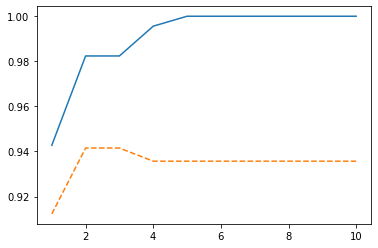

In [32]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, val_accuracy,linestyle = '--', label= 'Val Accuracy')

※max_depth = 3 으로 지정.  

최대 깊이가 증가할수록 모델의 정확도는 증가한다.  
depth = 2 이하인 경우는 traindata의 227개의 데이터가 과소적합될 것으로 생각하였고,    
depth = 4 이상부터는 trainAccuracy가 1로 과적합되어있는 상태일것이라 생각하였기에 3이 적당하다고 판단하였음.

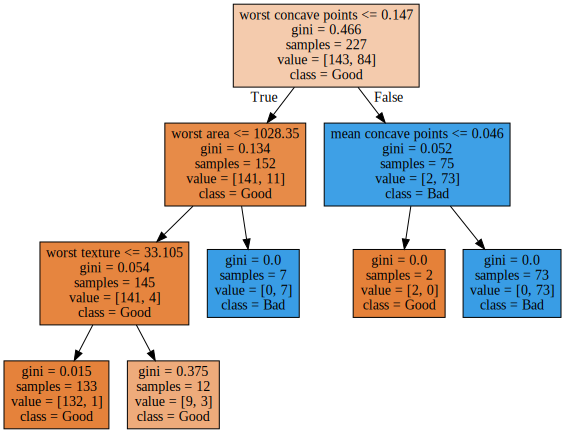

In [87]:
# max_depth = 3
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 3 , random_state =1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot",class_names=['Good',"Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

※의사결정나무 해석방법  
1. 총 227개의 samples중에서 악성진단 143개와 양성진단 84개로 나눌 수 있다.   
2. 깊이가 1인 경우, worst concave points가 0.147보다 작거나 같은 경우는 152개의 sample(왼쪽)이 있으며, 큰 경우 75개의 sample(오른쪽)으로 나뉠 수 있다. 두번째 라인 왼쪽 칸을 보면, 152개의 samples로 141개의 악성진단과 11개의 양성진단을 내렸다. 두번째 라인 오른쪽 칸을 보면, 75개의 samples로 2개의 악성진단과 73개의 양성진단을 내렸다. 첫번째 라인의 gini 계수 0.466보다 두번째 라인의 gini계수 0.134, 0.052 가 더 불순도가 낮은 것을 볼수 있다. 
3. 나머지도 동일한 방식으로 가지를 나누었고, 깊이가 3으로 두었기에 4번째 라인까지 가지가 나오는 것을 볼 수있다. 

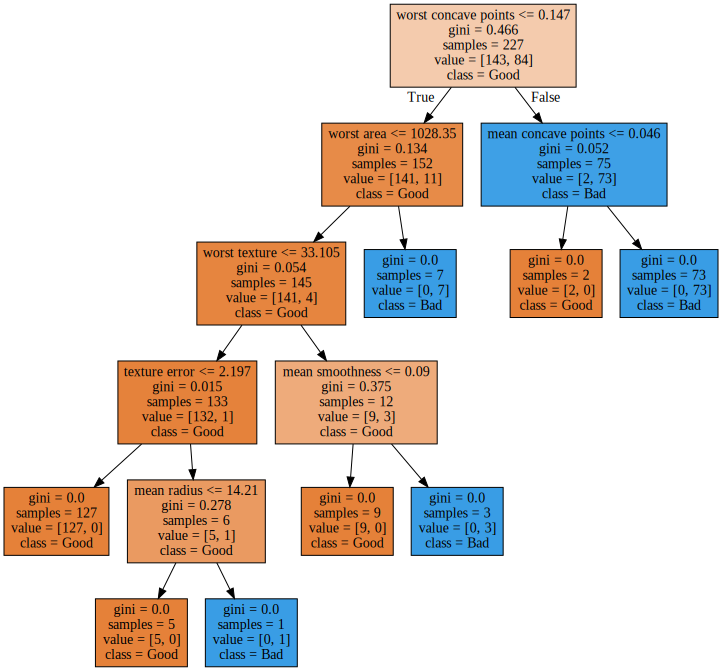

In [89]:
# max_depth = 6인경우 
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 6 , random_state =1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot",class_names=['Good',"Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [90]:
# min_samples_split 분할하기 위한 노드의 최소 샘플 
train_accuracy =[]; val_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth=3,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValAccuracy']=val_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,ValAccuracy
0,10,0.982,0.942
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.982,0.942
6,70,0.982,0.942
7,80,0.974,0.936
8,90,0.974,0.936
9,100,0.974,0.936


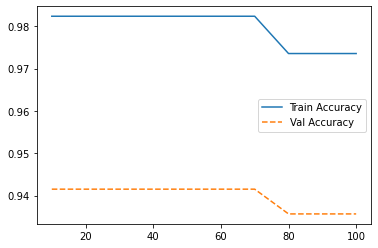

In [91]:
plt.plot(para_split, train_accuracy , linestyle = '-', label= "Train Accuracy")
plt.plot(para_split, val_accuracy , linestyle = '--', label= "Val Accuracy")
plt.legend()

※ min_samples_split = 80 으로 지정.  

분할하기 위한 노드의 최소 샘플수가 증가할수록 모델의 정확도는 감소하는 추세이다.    
split = 70 이하인 경우는 train accuracy의 값이 1에 가깝기에 traindata의 227개의 데이터가 과대적합 할 것으로 생각하였기에 split = 80 이 적당하다고 판단하였음.

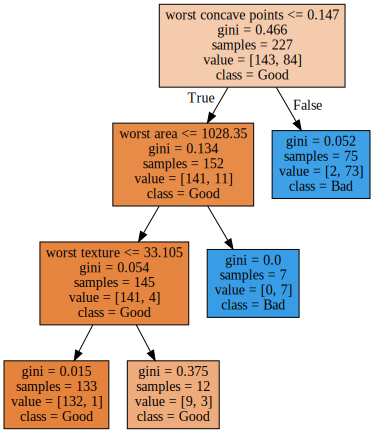

In [92]:
tree_low = DecisionTreeClassifier(max_depth= 3, min_samples_split = 80, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file="tree_low.dot",class_names=["Good",'Bad'],
               feature_names = v_feature_name, impurity = True, filled=True)

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

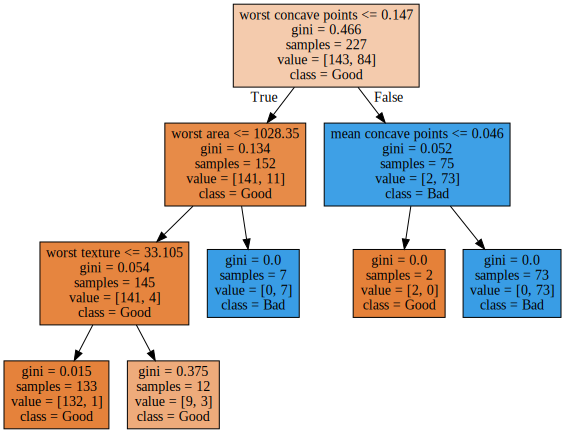

In [93]:
tree_high = DecisionTreeClassifier(max_depth= 3, min_samples_split = 30, random_state=1234)
tree_high.fit(df_train_x,df_train_y)

export_graphviz(tree_high,out_file="tree_high.dot",class_names=["Good",'Bad'],
               feature_names = v_feature_name, impurity = True, filled=True)

with open("tree_high.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

min_samples_split = 80 과 30을 비교해 보았을때 분류가 크게 달라지지 않으므로, min_samples_split = 30 선택

In [95]:
train_accuracy =[]; val_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth=3,
                                min_samples_split=30,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValAccuracy']=val_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,ValAccuracy
0,2,0.982,0.942
1,4,0.974,0.918
2,6,0.974,0.936
3,8,0.969,0.930
4,10,0.969,0.930
5,12,0.960,0.936
6,14,0.952,0.924
7,16,0.943,0.912
8,18,0.943,0.912
9,20,0.943,0.912


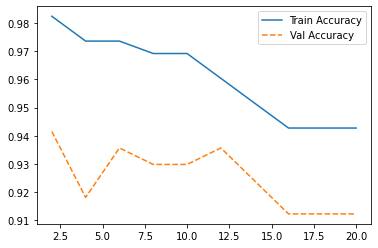

In [96]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

train accuracy와 val accuracy의 값이 차이가 최소인 min_samples_leaf = 8 과 12로 두고 최종모델의 분류예측을 실행시킴.

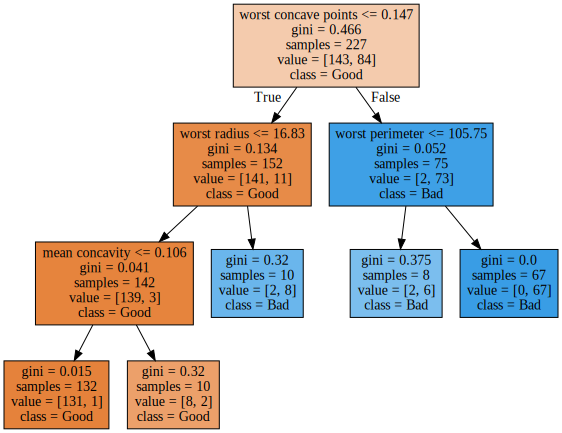

In [97]:
v_feature_name = df_train_x.columns


# min_samples_leaf = 8인 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=3,
                                 min_samples_split=30,
                                 min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_low.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [120]:
tree_final = DecisionTreeClassifier(max_depth=3, min_samples_split=30,
                                   min_samples_leaf=8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=30,
                       random_state=1234)

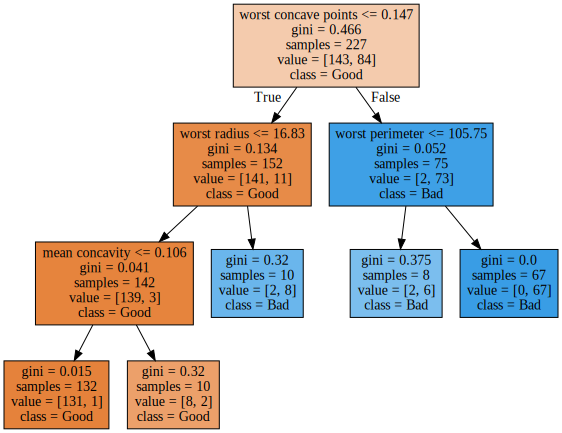

In [121]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [122]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.930

Confusion matrix :
[[98  7]
 [ 5 61]]


※ min_samples_leaf = 8과 12 의 최종모델 비교  
min_samples_leaf = 8일때, Confusion matrix 에서 실제 0을 1로 예측할 경우와 실제 1을 0으로 예측할 경우는 12로 Accuracy 값은 0.93 이 나왔다. min_samples_leaf = 12일 경우, Confusion matrix 에서 실제 0을 1로 예측할 경우와 실제 1을 0으로 예측할 경우는 14로 Accuracy값은 0.918이 나왔다.   

따라서, min_samples_leaf = 8, min_samples_split = 30, max_depth=3 일때 최종모델을 형성하였다.

In [101]:
df_test_x2 = df_raw.drop('diagnosis',axis=1)
df_test_x2.head()
v_feature_name = df_test_x2.columns

Text(0, 0.5, '설명변수')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: Runtim

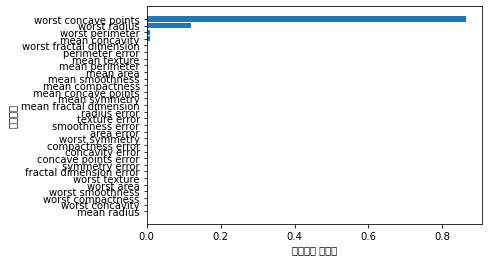

In [102]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=True, inplace=True)
corrdinates =range(len(df_importance))
plt.barh(y=corrdinates, width = df_importance['Importance'])
plt.yticks (corrdinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

※ 의사결정나무(분류) 최종모델을 형성하기 위해 worst concave points, worst radious 순으로 진단여부에 영향력을 주었다.

# 랜덤포레스트_분류

In [123]:
df=pd.read_csv("data/유방암.csv")
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
df.shape

(569, 31)

In [124]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [ ]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

In [ ]:
df_x=df_raw_dummy.drop("diagnosis", axis=1)
df_y=df_raw_dummy['diagnosis']

In [126]:
# 데이터분할 4:3:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
val data X size : (171, 30)
val data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [127]:
tree_uncustomized =  RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set : {:.3f}".format(tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set : 1.000
Accuracy on val set : 0.953


train 데이터에 과적합 되어있다.

In [128]:
tree_uncustomized

RandomForestClassifier(random_state=1234)

In [129]:
train_accuracy =[]; val_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['ValAccuracy']=val_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValAccuracy
0,10,0.996,0.953
1,20,0.996,0.953
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.947
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


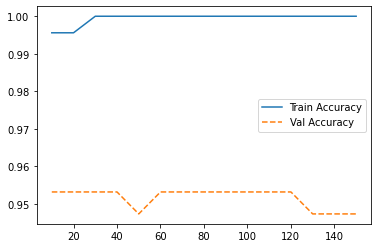

In [130]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

In [133]:
# error 저장리스트 
oob_error=[]

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

Text(0.5, 0, 'n_estimators')

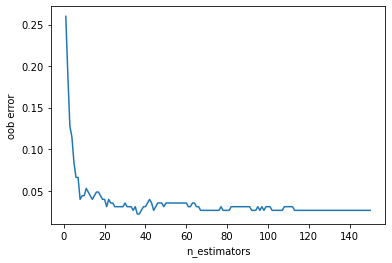

In [134]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel('n_estimators')

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 oob에러는 감소한다.  
train data 의 개수가 227개이기에, n_estimators = 20으로 트리수를 지정해주는 것이 좋다고 판단했음.   

In [145]:
train_accuracy =[]; val_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(n_estimators=20,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['ValAccuracy']=val_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValAccuracy
0,1,0.952,0.953
1,2,0.982,0.947
2,3,0.987,0.947
3,4,0.991,0.947
4,5,0.996,0.953
5,6,0.996,0.953
6,7,0.996,0.953
7,8,0.996,0.953
8,9,0.996,0.953
9,10,0.996,0.953


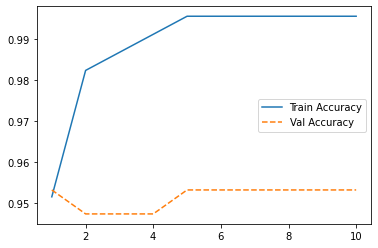

In [146]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

max_depth의 값이 5이상이면 과적합의 가능성이 높다고 판단하였고, 2이하이면 과소적합될 가능성이 높기에, max_depth = 3 으로 지정했음.

In [148]:
train_accuracy =[]; val_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=20,max_depth=3,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValAccuracy']=val_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,ValAccuracy
0,10,0.987,0.942
1,20,0.982,0.942
2,30,0.978,0.942
3,40,0.978,0.942
4,50,0.978,0.947
5,60,0.978,0.947
6,70,0.969,0.942
7,80,0.969,0.942
8,90,0.969,0.947
9,100,0.965,0.953


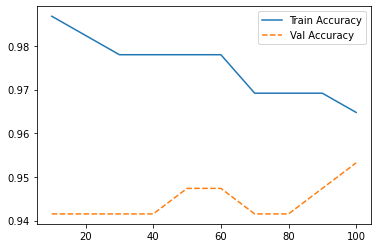

In [149]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

Train과 Val의 차이가 가장 적게 존재하는 min_samples_split = 50 로 지정.

In [153]:
train_accuracy =[]; val_accuracy=[]

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=RandomForestClassifier(n_estimators=20,max_depth=3,
                                min_samples_split=50,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    val_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValAccuracy']=val_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,ValAccuracy
0,10,0.974,0.942
1,20,0.978,0.942
2,30,0.974,0.947
3,40,0.965,0.953
4,50,0.965,0.959
5,60,0.938,0.942
6,70,0.921,0.930
7,80,0.630,0.637
8,90,0.630,0.637
9,100,0.630,0.637


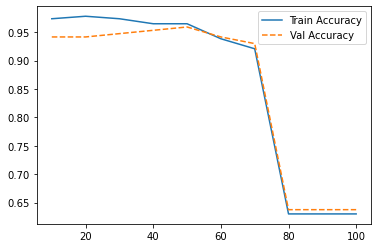

In [154]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

Train과 Val의 차이가 가장 적게 존재하는 min_samples_leaf = 60 로 지정.

In [156]:
#최종모델
rf_final = RandomForestClassifier(n_estimators=20,max_depth=3, min_samples_split=50,
                                   min_samples_leaf=60, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.938
Accuracy on test set : 0.883
Confusion matrix : 
[[95 10]
 [10 56]]


※ 최종모델   
Confusion matrix 에서 실제 0을 1로 예측할 경우와 실제 1을 0으로 예측할 경우는 20으로 Accuracy 값은 0.88 이 나왔다.   
따라서, n_estimators=20,max_depth=3, min_samples_split=50, min_samples_leaf=60 랜덤포레스트(분류) 최종모델을 형성하였다.

In [159]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,mean concavity,0.20
7,mean concave points,0.15
27,worst concave points,0.15
22,worst perimeter,0.15
0,mean radius,0.05
23,worst area,0.05
2,mean perimeter,0.05
3,mean area,0.05
20,worst radius,0.05
5,mean compactness,0.05


Text(0, 0.5, '설명변수')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: Runtim

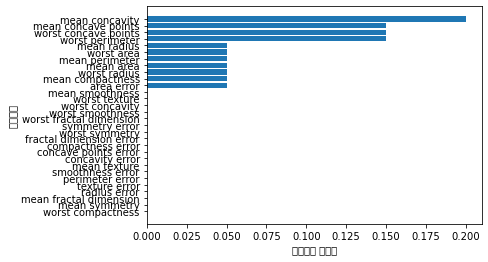

In [160]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

※ 랜덤포레스트 최종모델을 형성하기 위해서 사용된 변수의 중요도는 위의 그래프와 같다.